In [19]:
# import some data and modules 
from pyedfread import edf
import matplotlib.pyplot as plt
import numpy as np
import os

import pandas as pd
#from data import 230911_1


In [34]:
## parse data into different dataframes

samples, events, messages = edf.pread('230911_1.EDF')



# quick look at the data
print(events)
#print(events.describe())
#print(samples)



       time      type    start      end    hstx    hsty         gstx  \
0         0  fixation  2323014  2323550 -4056.0  2743.0    83.199997   
1         0   saccade  2323551  2323601 -4076.0  2828.0    79.400002   
2         0  fixation  2323602  2324040 -7051.0  4896.0  -545.500000   
3         0   saccade  2324041  2324224 -7118.0  4849.0  -560.299988   
4         0  fixation  2324225  2324473 -6103.0  4710.0  -344.399994   
...     ...       ...      ...      ...     ...     ...          ...   
12701     0  fixation  5457774  5457928   703.0  5673.0  1108.900024   
12702     0   saccade  5457929  5458273   749.0  5596.0  1118.900024   
12703     0  fixation  5458274  5458417 -1580.0  6967.0   625.900024   
12704     0   saccade  5458418  5458776 -1649.0  6934.0   611.400024   
12705     0  fixation  5458777  5458925   813.0  4980.0  1133.099976   

              gsty     sta    henx  ...         pvel       svel  evel  \
0      1124.599976  2166.0 -4075.0  ...    76.900002  76.90000

In [ ]:
def pixels_to_dva(pixels, viewing_distance, screen_size, screen_resolution):
    # Calculate Pixels per Inch (PPI)
    ppi = np.sqrt(screen_resolution[0]**2 + screen_resolution[1]**2) / screen_size

    # Calculate Degrees per Pixel (DPP)
    dpp = np.arctan(1 / (2 * viewing_distance * ppi)) * (180 / np.pi)

    # Convert Pixels to DVA
    dva = pixels * dpp

    return dva

In [11]:
#print(events.columns)
column_names = events.columns.tolist()
#print(column_names)

messages_columns = messages.columns.tolist()
print(messages_columns)
print(messages['TRIAL_RESULT_time'])

['!CMD', '!CMD_time', 'DISPLAY_COORDS', 'DISPLAY_COORDS_time', 'RETRACE_INTERVAL', 'RETRACE_INTERVAL_time', 'ENVIRONMENT', 'ENVIRONMENT_time', 'TRACKER_TIME', 'TRACKER_TIME_time', 'PreCal', 'PreCal_time', '-16', '-16_time', '0', '0_time', '!CAL', '!CAL_time', 'camera_setup', 'camera_setup_time', 'py_trial_marker', 'trialid ', 'trialid_time', 'RECCFG', 'RECCFG_time', 'ELCLCFG', 'ELCLCFG_time', 'GAZE_COORDS', 'GAZE_COORDS_time', 'THRESHOLDS', 'THRESHOLDS_time', 'ELCL_WINDOW_SIZES', 'ELCL_WINDOW_SIZES_time', 'CAMERA_LENS_FOCAL_LENGTH', 'CAMERA_LENS_FOCAL_LENGTH_time', 'PUPIL_DATA_TYPE', 'PUPIL_DATA_TYPE_time', 'ELCL_PROC', 'ELCL_PROC_time', 'ELCL_EFIT_PARAMS', 'ELCL_EFIT_PARAMS_time', '!MODE', '!MODE_time', '-9', '-9_time', '-13', '-13_time', 'greyScreenOnTTL', 'greyScreenOnTTL_time', 'greyScreenOnTTLEnd', 'greyScreenOnTTLEnd_time', 'rewardOn1', 'rewardOn1_time', 'rewardOff', 'rewardOff_time', '-14', '-14_time', 'rewardOff2', 'rewardOff2_time', 'updateTotalTrialAndCorrectTrialCount', 'upd

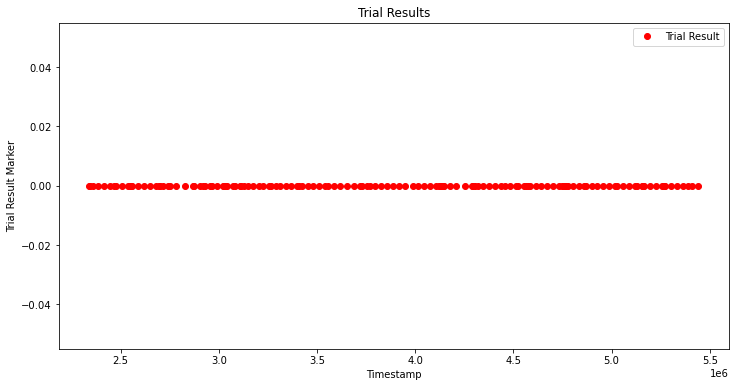

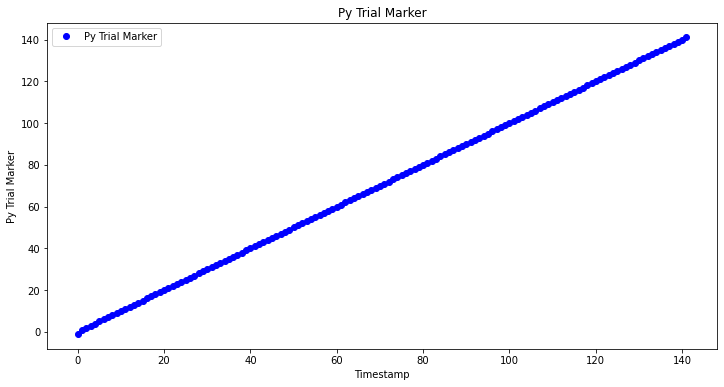

0.0            NaN
141.0          NaN
1.0      2341355.0
2.0      2346990.0
3.0      2357222.0
           ...    
NaN          137.0
NaN          138.0
NaN          139.0
NaN          140.0
NaN          141.0
Name: Trial_Result_Time, Length: 284, dtype: float64
0.0            NaN
141.0          NaN
1.0      2341355.0
2.0      2346990.0
3.0      2357222.0
4.0      2386587.0
5.0      2415953.0
6.0      2445320.0
7.0      2467135.0
8.0      2477252.0
9.0      2506619.0
10.0     2535985.0
11.0     2546350.0
12.0     2552218.0
13.0     2558535.0
14.0     2589483.0
15.0     2618849.0
16.0     2648216.0
17.0     2678381.0
18.0     2695014.0
Name: Trial_Result_Time, dtype: float64


In [43]:
# Assuming 'events' is the DataFrame containing EDF event data
# and 'messages' is the DataFrame containing EDF messages data

# Extracting relevant columns from 'events'
trial_result_data = messages[['TRIAL_RESULT_time', 'TRIAL_RESULT']]

# Extracting relevant columns from 'messages'
py_trial_marker_data = messages[['py_trial_marker']]

# Merging the two DataFrames on time column
df = pd.merge(trial_result_data, py_trial_marker_data, how='outer', left_on='TRIAL_RESULT_time', right_index=True)

# Renaming columns for clarity
df = df.rename(columns={'TRIAL_RESULT_time': 'Trial_Result_Time', 'TRIAL_RESULT': 'Trial_Result',
                        'py_trial_marker': 'Py_Trial_Marker'})

# Plotting Trial Results
plt.figure(figsize=(12, 6))
plt.plot(df['Trial_Result_Time'], df['Trial_Result'], 'ro', label='Trial Result')
plt.title('Trial Results')
plt.xlabel('Timestamp')
plt.ylabel('Trial Result Marker')
plt.legend()
plt.show()

# Plotting Py Trial Marker
plt.figure(figsize=(12, 6))
plt.plot(df['Trial_Result_Time'], df['Py_Trial_Marker'], 'bo', label='Py Trial Marker')
plt.title('Py Trial Marker')
plt.xlabel('Timestamp')
plt.ylabel('Py Trial Marker')
plt.legend()
plt.show()

print(df['Trial_Result_Time'])

print(df['Trial_Result_Time'].head(20))

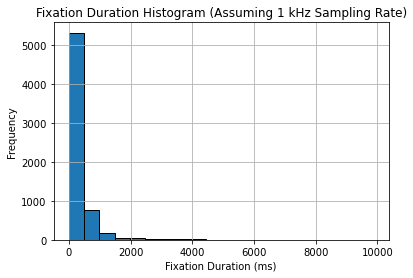

In [5]:
# Step 1: Filter the DataFrame for fixation data
fixdata = events[events['type'] == 'fixation'].copy()  # Make a copy to avoid SettingWithCopyWarning

# Calculate fixation duration in milliseconds (assuming 1 kHz sampling rate)
fixdata['duration_ms'] = (fixdata['end'] - fixdata['start'])   # 

# Create a histogram of fixation durations
plt.hist(fixdata['duration_ms'], bins=20, edgecolor='k')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.title('Fixation Duration Histogram (Assuming 1 kHz Sampling Rate)')
plt.grid(True)

# Show the plot
plt.show()

<ipython-input-29-1a3b559e296b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saccades['amplitude'] = ((saccades['gstx'] - saccades['hstx'])**2 + (saccades['gsty'] - saccades['hsty'])**2)**0.5
<ipython-input-29-1a3b559e296b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saccades['duration_ms'] = (saccades['end'] - saccades['start'])  #


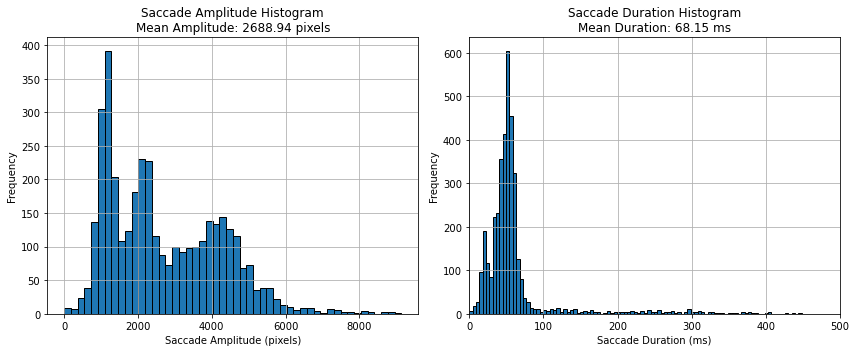

In [29]:

# Filter for saccades only
saccades = events[events['type'] == 'saccade']

# Calculate saccade amplitudes as Euclidean distances
saccades['amplitude'] = ((saccades['gstx'] - saccades['hstx'])**2 + (saccades['gsty'] - saccades['hsty'])**2)**0.5

# Calculate saccade durations (time in milliseconds)
saccades['duration_ms'] = (saccades['end'] - saccades['start'])  # 

# Summary statistics
mean_amplitude = saccades['amplitude'].mean()
mean_duration = saccades['duration_ms'].mean()

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(saccades['amplitude'], bins=50, edgecolor='k')
plt.xlabel('Saccade Amplitude (pixels)')
plt.ylabel('Frequency')
plt.title(f'Saccade Amplitude Histogram\nMean Amplitude: {mean_amplitude:.2f} pixels')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(saccades['duration_ms'], bins=500, edgecolor='k')
plt.xlabel('Saccade Duration (ms)')
plt.xlim((0, 500))
plt.ylabel('Frequency')
plt.title(f'Saccade Duration Histogram\nMean Duration: {mean_duration:.2f} ms')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# import a DAT file

# Replace 'your_dat_file.dat' with the actual path to your DAT file
dat_file_path = 'your_dat_file.dat'

# Use pandas to read the DAT file into a DataFrame
dat_df = pd.read_csv(dat_file_path, delimiter='\t', header=None)

# Display the first few rows of the DataFrame to inspect the data
print(dat_df.head())



In [41]:
#import a text file e.g. a results file


# Replace 'your_results_file.txt' with the actual path to your text file
results_file_path = 'RESULTS_FILE.txt'

# Use pandas to read the tab-delimited text file into a DataFrame
results_df = pd.read_csv(results_file_path, delimiter='\t')

# Display the first few rows of the DataFrame to inspect the data
print(results_df.head())


  Session_Name_  Trial_Index_      standard_1      standard_2      standard_3  \
0      230911_1             1   (318.0,354.0)   (775.0,206.0)  (1463.0,334.0)   
1      230911_1             2   (305.0,535.0)   (502.0,132.0)  (1230.0,339.0)   
2      230911_1             3  (1178.0,163.0)  (1209.0,550.0)  (1398.0,960.0)   
3      230911_1             4  (1550.0,877.0)   (429.0,878.0)   (250.0,258.0)   
4      230911_1             5  (1181.0,772.0)   (643.0,689.0)   (318.0,354.0)   

       standard_4       deviant_5 standard_stim deviant_stim  standard_size  \
0  (1181.0,772.0)   (643.0,689.0)             A            A             55   
1  (1507.0,575.0)   (930.0,925.0)             A            A             55   
2   (443.0,580.0)   (324.0,133.0)             A            A             55   
3   (982.0,123.0)  (1586.0,310.0)             A            A             55   
4   (775.0,206.0)  (1463.0,334.0)             A            A             55   

   deviant_size  fixationDurationRequi

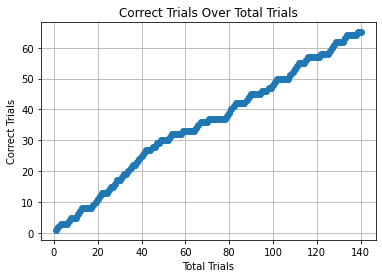

In [42]:
# Plot the number of correct trials over total trials
plt.plot(results_df['trialCount_total'], results_df['trialCount_correctTotal'], marker='o')

# Add labels and title
plt.xlabel('Total Trials')
plt.ylabel('Correct Trials')
plt.title('Correct Trials Over Total Trials')

# Show the plot
plt.grid()
plt.show()

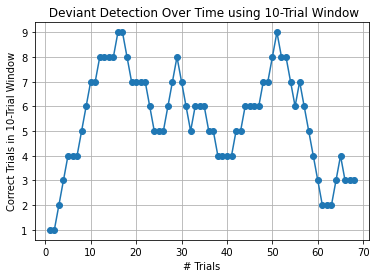

In [33]:
# Sliding window analysis of accuracy

# Define the size of the sliding window
window_size = 10

# Calculate the number of correct trials in each window
correct_trials_in_window = results_df['trialCount_correctTotal'].diff(periods=window_size).fillna(results_df['trialCount_correctTotal'])

# Plot the number of correct trials in the sliding window over total trials
plt.plot(results_df['trialCount_total'], correct_trials_in_window, marker='o')

# Add labels and title
plt.xlabel('# Trials')
plt.ylabel(f'Correct Trials in {window_size}-Trial Window')
plt.title(f'Accuracy Over Time using {window_size}-Trial Window')

# Save the figure as a PDF
plt.savefig('file123_sliding_window_analysis.pdf')

# Show the plot
plt.grid()
plt.show()



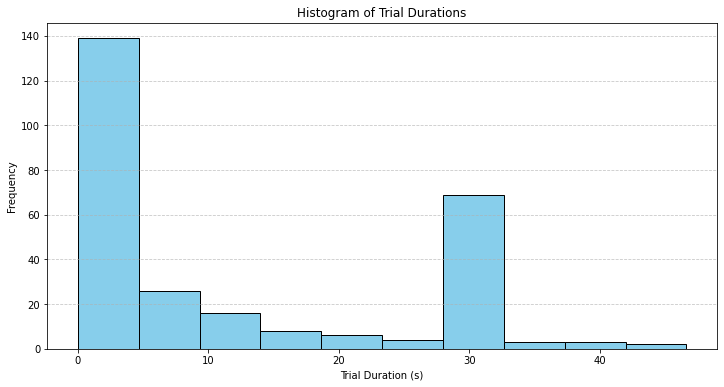

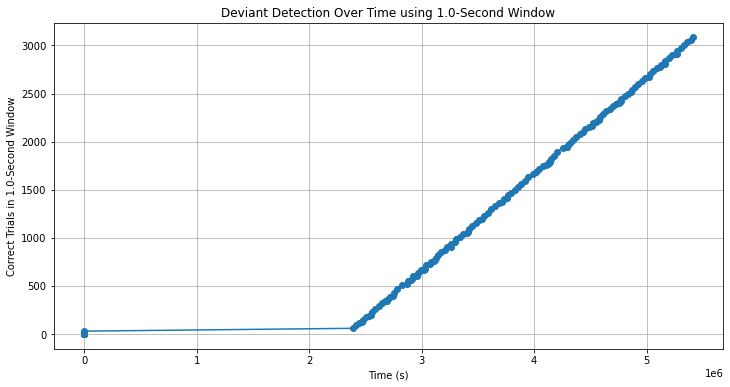

In [47]:
# plot correct over time instead of over trials

# Assuming 'df' is the DataFrame containing relevant data
# Replace 'Trial_Result_Time' with the correct column name if needed

# Sort the DataFrame based on trial result time
df.sort_values(by='Trial_Result_Time', inplace=True)

# Define the assumed sampling rate (adjust as needed)
sampling_rate = 1000  # 1 kHz assumed sampling rate, adjust as needed

# Calculate the time difference between consecutive trial result times in seconds
df['Trial_Result_Duration'] = df['Trial_Result_Time'].diff() / sampling_rate
# Exclude trials with duration > 1000 seconds
df = df[df['Trial_Result_Duration'] <= 1000]

# Plot histogram of trial durations
plt.figure(figsize=(12, 6))
plt.hist(df['Trial_Result_Duration'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Trial Duration (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Trial Durations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

# Define the size of the sliding window in seconds
window_size_seconds = 1.0  # Adjust as needed

# Calculate the number of correct trials in each window
window_size_samples = int(window_size_seconds * sampling_rate)
correct_trials_in_window = df['Trial_Result_Duration'].rolling(window=window_size_samples, min_periods=1).sum()

# Remove the first data point at 0,0
correct_trials_in_window = correct_trials_in_window[1:]

# Plot the number of correct trials in the sliding window over time
plt.figure(figsize=(12, 6))
plt.plot(df['Trial_Result_Time'][:-1], correct_trials_in_window, marker='o')
plt.xlabel('Time (s)')
plt.ylabel(f'Correct Trials in {window_size_seconds}-Second Window')
plt.title(f'Deviant Detection Over Time using {window_size_seconds}-Second Window')
plt.grid()
plt.show()


       Trial_Result_Time  Trial_Result_Duration
count       2.820000e+02             281.000000
mean        1.918758e+06              19.360249
std         2.041209e+06             139.640082
min         0.000000e+00               0.001000
25%         7.025000e+01               0.001000
50%         1.405000e+02               0.001000
75%         3.848602e+06              29.365000
max         5.440230e+06            2341.214000


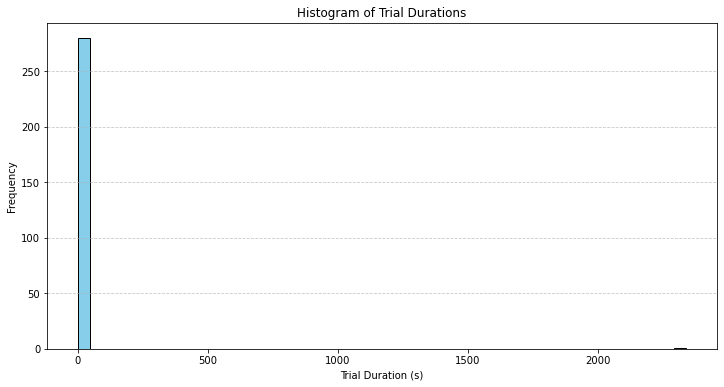

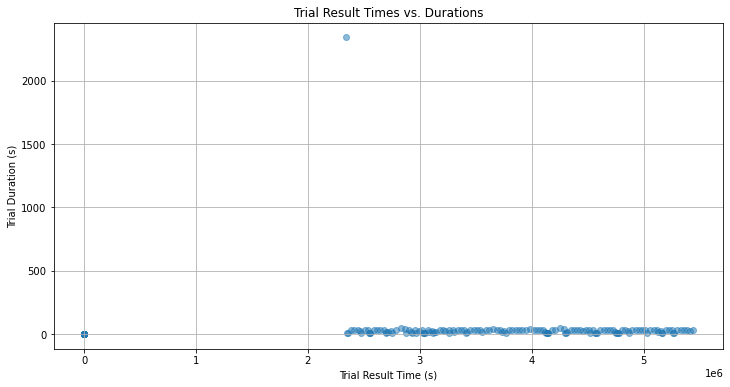

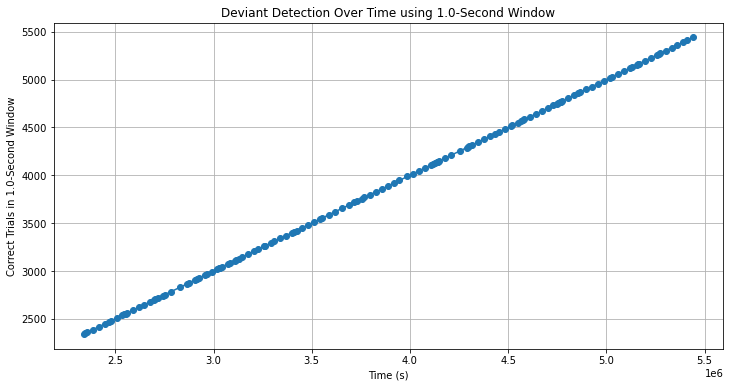

In [40]:
# second attempt at sliding window analysis

# Assuming 'df' is the DataFrame containing relevant data
# Replace 'Trial_Result_Time' with the correct column name if needed

# Sort the DataFrame based on trial result time
df.sort_values(by='Trial_Result_Time', inplace=True)

# Define the assumed sampling rate (adjust as needed)
sampling_rate = 1000  # 1 kHz assumed sampling rate, adjust as needed


# Print some information about the data
print(df[['Trial_Result_Time', 'Trial_Result_Duration']].describe())

# Plot histogram of trial durations
plt.figure(figsize=(12, 6))
plt.hist(df['Trial_Result_Duration'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Trial Duration (s)')
plt.ylabel('Frequency')
plt.title('Histogram of Trial Durations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot trial result times and durations
plt.figure(figsize=(12, 6))
plt.scatter(df['Trial_Result_Time'], df['Trial_Result_Duration'], marker='o', alpha=0.5)
plt.xlabel('Trial Result Time (s)')
plt.ylabel('Trial Duration (s)')
plt.title('Trial Result Times vs. Durations')
plt.grid()
plt.show()

# Define the size of the sliding window in seconds
window_size_seconds = 1.0  # Adjust as needed

# Calculate the number of correct trials in each window
window_size_samples = int(window_size_seconds * sampling_rate)
correct_trials_in_window = df['Trial_Result_Duration'].rolling(window=window_size_samples, min_periods=1).sum()

# Remove the first data point at 0,0
correct_trials_in_window = correct_trials_in_window[1:]

# Plot the number of correct trials in the sliding window over time
plt.figure(figsize=(12, 6))
plt.plot(df['Trial_Result_Time'][1:], correct_trials_in_window, marker='o')
plt.xlabel('Time (s)')
plt.ylabel(f'Correct Trials in {window_size_seconds}-Second Window')
plt.title(f'Deviant Detection Over Time using {window_size_seconds}-Second Window')
plt.grid()
plt.show()
